# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студентки гр. 2383 Анищенко Анастасия Ивановна и Бараева Елизавета Николаевна. Вариант №12.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Дискретное преобразование Фурье:

$X(n) = \sum_{k=0}^{N-1} x_k e^{-i \frac{2 \pi n}{N} k}, \quad n = 0, 1, 2, ..., N - 1$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
import math as m
import random

In [26]:
# Функция сигнала
def s(t):
  return sum([A_norm[i] * m.cos(w[i] * t + phi[i]) for i in range(n)])

# Функция дискретного преобразования Фурье
def dft(x):
    X = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            X[n] += x[k] * np.exp(-1j * 2 * np.pi * n * k / N)
    return X

# Функция линейного сглаживания по 5-ти точкам
def smooth5_poly1(x):
    y = []
    for n in range(N):
        s = 0
        count = 0
        for k in range(-2, 3):
            if 0 <= n + k < N:
                s += x[n + k]
                count += 1
        y.append(s / 5)
    return y

# Функция линейного сглаживания по 9-ти точкам
def smooth9_poly1(x):
    y = []
    for n in range(N):
        s = 0
        count = 0
        for k in range(-4, 5):
            if 0 <= n + k < N:
                s += x[n + k]
                count += 1
        y.append(s / 9)
    return y

# Функция сглаживания полиномом 2-ой степени по 5-ти точкам
def smooth5_poly2(x):
    y = np.zeros(N)
    w = np.array([-3, 12, 17, 12, -3]) / 35
    for n in range(N):
        for k in range(-2, 3):
            idx = n + k
            if 0 <= idx < N:
                y[n] += w[k + 2] * x[idx]
    return y

# Функция сглаживания полиномом 2-ой степени по 9-ти точкам
def smooth9_poly2(x):
    y = np.zeros(N)
    w = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231
    for n in range(N):
        for k in range(-4, 5):
            idx = n + k
            if 0 <= idx < N:
                y[n] += w[k + 4] * x[idx]
    return y

# Функция сглаживания полиномом 4-ой степени по 7-ми точкам
def smooth7_poly4(x):
    y = np.zeros(N)
    w = np.array([5, -30, 75, 131, 75, -30, 5]) / 231
    for n in range(N):
        for k in range(-3, 4):
            idx = n + k
            if 0 <= idx < N:
                y[n] += w[k + 3] * x[idx]
    return y

# Функция сглаживания полиномом 4-ой степени по 11-ти точкам
def smooth11_poly4(x):
    y = np.zeros(N)
    w = np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429
    for n in range(N):
        for k in range(-5, 6):
            idx = n + k
            if 0 <= idx < N:
                y[n] += w[k + 5] * x[idx]
    return y

## Задание 1

In [27]:
# Дано
T = 1
n = 11
dw = m.pi * 0.1
N = 32
A = np.arange(1, 12)
random.shuffle(A)
A_norm = A / sum(A)
w = [dw * i for i in range(n)]
phi = [random.uniform(0, 0.5) for i in range(n)]

# Аналоговый сигнал
t_analog = np.arange(0, N, 0.001)
S_analog = [s(i) for i in t_analog]

# Дискретизированный сигнал
t_discrete = np.arange(N)
S_discrete = [s(i) for i in t_discrete]

## Задание 2

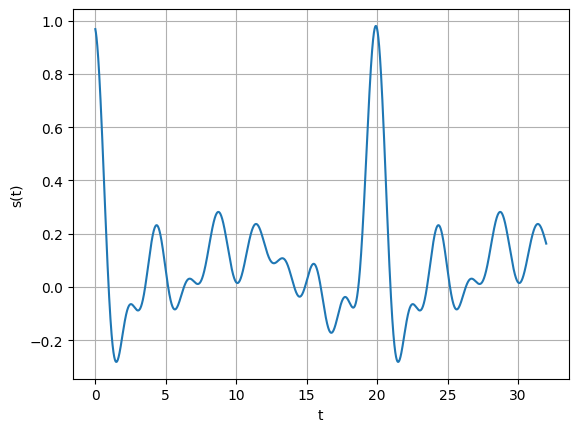

In [28]:
# График аналогового сигнала
plt.figure()
plt.plot(t_analog, S_analog)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid()
plt.show()

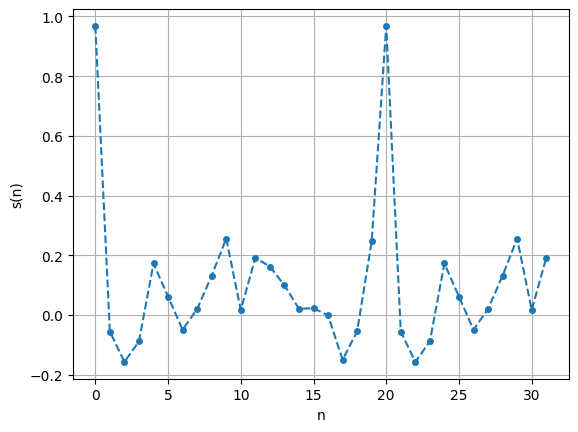

In [29]:
# График дискретизированного сигнала
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4)
plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.show()

## Задание 3

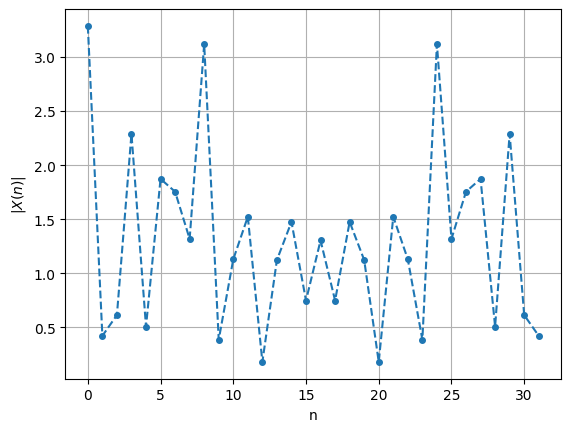

In [30]:
# Дискретное преобразование Фурье
Xn = dft(S_discrete)

# График дискретных отсчетов спектра дискретного сигнала
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4)
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.grid()
plt.show()

## Задание 4

***Сглаживание прямой линией по 5-ти точкам:***

$y_n = \frac{1}{5} \sum_{k=n-2}^{k=n+2} s_k = \frac{1}{5} (s_{n-2} + s_{n-1} + s_{n} + s_{n+1} + s_{n+2})$

***Передаточная функция при сглаживании прямой линией по 5-ти точкам:***

$H(w) = \frac{1}{5} (1 + 2cos(w) + 2cos(2w))$

***Сглаживание прямой линией по 9-ти точкам:***

$y_n = \frac{1}{9} \sum_{k=n-4}^{k=n+4} s_k = \frac{1}{9} (s_{n-4} + s_{n-3} + s_{n-2} + s_{n-1} + s_{n} + s_{n+1} + s_{n+2} + s_{n+3} + s_{n+4})$

***Передаточная функция при сглаживании прямой линией по 9-ти точкам:***

$H(w) = \frac{1}{9} (1 + 2cos(w) + 2cos(2w) + 2cos(3w) + 2cos(4w))$

In [31]:
# Линейное сглаживание по 5-ти точкам
S_discrete_smooth5 = smooth5_poly1(S_discrete)

In [32]:
# Линейное сглаживание по 9-ти точкам
S_discrete_smooth9 = smooth9_poly1(S_discrete)

## Задание 5

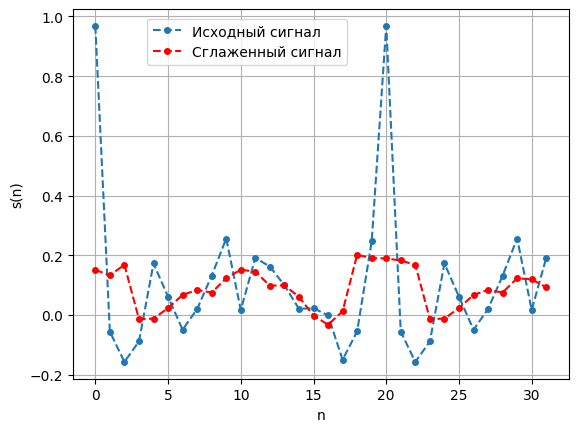

In [33]:
# График линейно сглаженного по 5-ти точкам дискретного сигнала совместно с исходным
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_smooth5, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

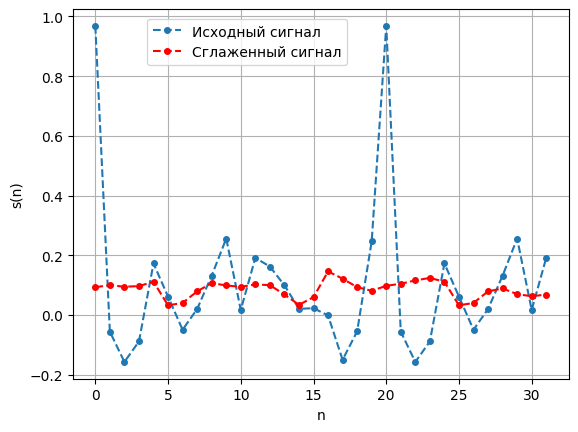

In [34]:
# График линейно сглаженного по 9-ти точкам дискретного сигнала совместно с исходным
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_smooth9, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

## Задание 6

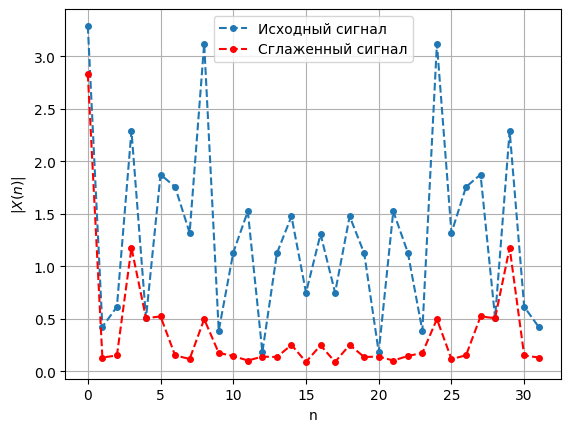

In [35]:
# ДПФ сигнала линейно сглаженного по 5-ти точкам
Xn_smooth5 = dft(S_discrete_smooth5)

# График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 5-ти точкам совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_smooth5), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

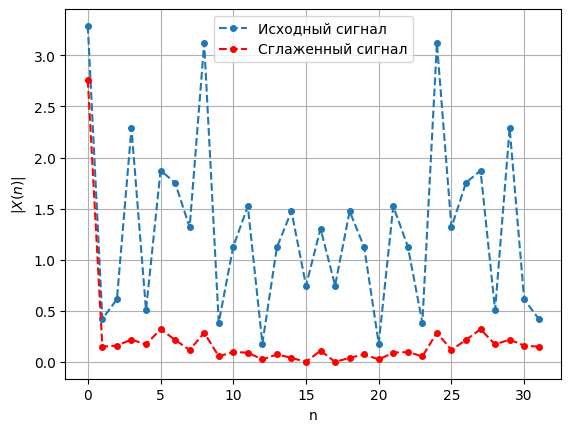

In [36]:
# ДПФ сигнала линейно сглаженного по 9-ти точкам
Xn_smooth9 = dft(S_discrete_smooth9)

# График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 9-ти точкам совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_smooth9), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

## Задание 7

По графику спектра видно, что он симметричен после значения $n$ равного 16, поэтому при анализе будет учитываться только 1-ая половина.

Линейное сглаживание имеет самую маленькую полосу пропускания: начальные отсчеты остаются почти без изменений. Средние и последние отсчеты подавляются: для сглаживания по 5-ти точкам сигнал слабо повторяет форму исходного, в то время как для 9-ти точек сигнал не похож на исходный. Полученный результат соответствует значениям $H(w)$.


## Задание 8(a)

#### Пункт 4

***Сглаживание полиномом 2-ой степени по 5-ти точкам:***

$y_n = \frac{1}{35} (-3s_{n-2} + 12s_{n-1} + 17s_{n} + 12s_{n+1} - 3s_{n+2})$

***Передаточная функция при сглаживании полиномом 2-ой по 5-ти точкам:***

$H(w) = \frac{1}{35} (17 + 24cos(w) - 6cos(2w))$

***Сглаживание полиномом 2-ой по 9-ти точкам:***

$y_n = \frac{1}{231} (-21s_{n-4} + 14s_{n-3} + 39s_{n-2} + 54s_{n-1} + 59s_{n} + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4})$

***Передаточная функция при сглаживании полиномом 2-ой по 9-ти точкам:***

$H(w) = \frac{1}{231} (59 + 108cos(w) + 78cos(2w) + 28cos(3w) - 42cos(4w))$

In [37]:
# Сглаживание полиномом 2-ой степени по 5-ти точкам
S_discrete_smooth5 = smooth5_poly2(S_discrete)

In [38]:
# Сглаживание полиномом 2-ой степени по 9-ти точкам
S_discrete_smooth9 = smooth9_poly2(S_discrete)

#### Пункт 5

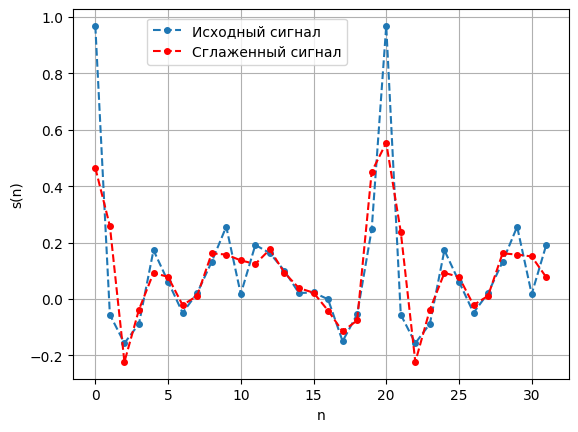

In [39]:
# График сглаженного полиномом 2-ой степени по 5-ти точкам дискретного сигнала совместно с исходным
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_smooth5, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

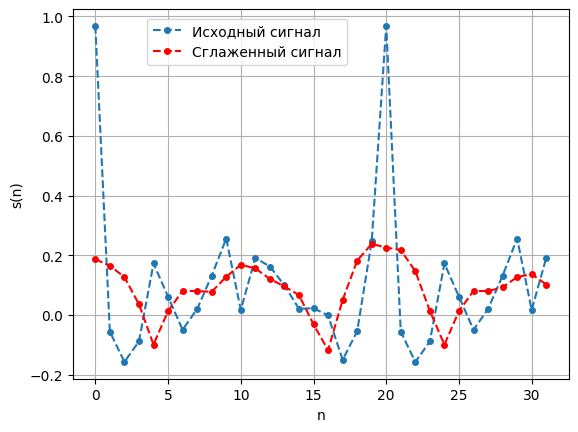

In [40]:
# График сглаженного полиномом 2-ой степени по 9-ти точкам дискретного сигнала совместно с исходным
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_smooth9, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

#### Пункт 6

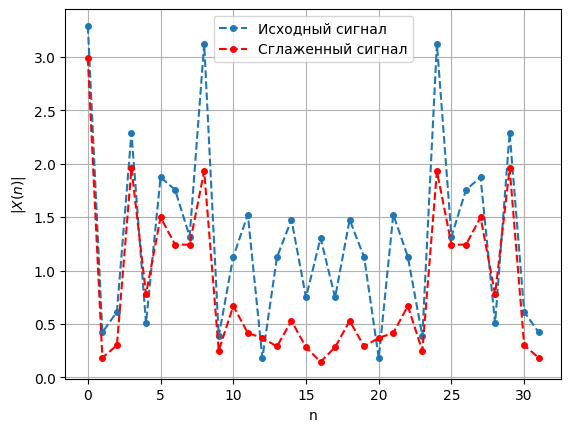

In [41]:
# ДПФ сигнала сглаженного полиномом 2-ой степени по 5-ти точкам
Xn_smooth5 = dft(S_discrete_smooth5)

# График дискретных отсчетов спектра дискретного сигнала сглаженного полиномом 2-ой степени по 5-ти точкам совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_smooth5), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

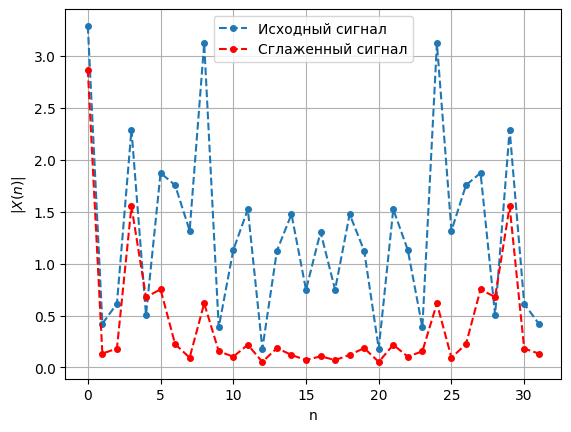

In [42]:
# ДПФ сигнала сглаженного полиномом 2-ой степени по 9-ти точкам
Xn_smooth9 = dft(S_discrete_smooth9)

# График дискретных отсчетов спектра дискретного сигнала сглаженного полиномом 2-ой степени по 9-ти точкам совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_smooth9), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

#### Пункт 7

По графику спектра видно, что он симметричен после значения $n$ равного 16, поэтому при анализе будет учитываться только 1-ая половина.

Сглаживание полиномом 2-ой степени имеет полосу пропускания больше, чем линейное сглаживание: начальные отсчеты остаются почти без изменений. По графику видно, что при увеличении количества точек при сглаживании, полоса пропускания уменьшается. Для сглаживания по 5-ти точкам сигнал на средних отсчетах хорошо повторяет исходный, а на последних отсчетах (10-16) плохо. Для сглаживания по 9-ти точкам средние и последние отсчеты сильно подавляются. Полученный результат соответствует значениям $H(w)$.

## Задание 8(b)

#### Пункт 4

***Сглаживание полиномом 4-ой степени по 7-ми точкам:***

$y_n = \frac{1}{231} (5s_{n-3} - 30s_{n-2} + 75s_{n-1} + 131s_{n} + 75s_{n+1} - 30s_{n+2} + 5s_{n+3})$

***Передаточная функция при сглаживании полиномом 4-ой по 7-ми точкам:***

$H(w) = \frac{1}{231} (131 + 150cos(w) - 60cos(2w) + 10cos(3w))$

***Сглаживание полиномом 4-ой по 11-ти точкам:***

$y_n = \frac{1}{429} (18s_{n-5} - 45s_{n-4} - 10s_{n-3} + 60s_{n-2} + 120s_{n-1} + 143s_{n} + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} + 18s_{n+5})$

***Передаточная функция при сглаживании полиномом 4-ой по 11-ти точкам:***

$H(w) = \frac{1}{429} (143 + 240cos(w) + 120cos(2w) - 20cos(3w) - 90cos(4w) + 36cos(5w))$

In [43]:
# Сглаживание полиномом 4-ой степени по 7-ми точкам
S_discrete_smooth7 = smooth7_poly4(S_discrete)

In [44]:
# Сглаживание полиномом 4-ой степени по 11-ти точкам
S_discrete_smooth11 = smooth11_poly4(S_discrete)

#### Пункт 5

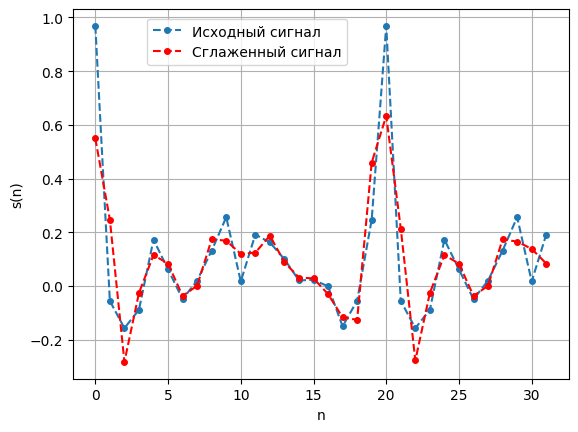

In [45]:
# График сглаженного полиномом 4-ой степени по 7-ми точкам дискретного сигнала совместно с исходным
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_smooth7, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

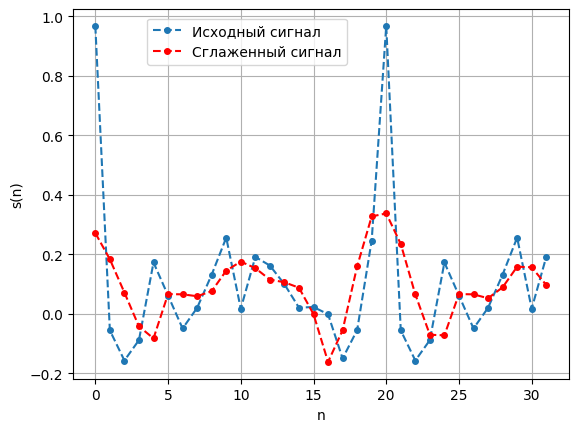

In [46]:
# График сглаженного полиномом 4-ой степени по 11-ти точкам дискретного сигнала совместно с исходным
plt.figure()
plt.plot(t_discrete, S_discrete, linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, S_discrete_smooth11, color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend(loc=(0.15, 0.85))
plt.grid()
plt.show()

#### Пункт 6

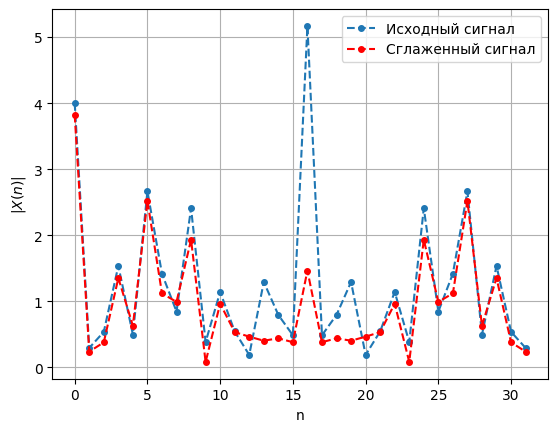

In [23]:
# ДПФ сигнала сглаженного полиномом 4-ой степени по 7-ми точкам
Xn_smooth7 = dft(S_discrete_smooth7)

# График дискретных отсчетов спектра дискретного сигнала сглаженного полиномом 4-ой степени по 7-ми точкам совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_smooth7), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

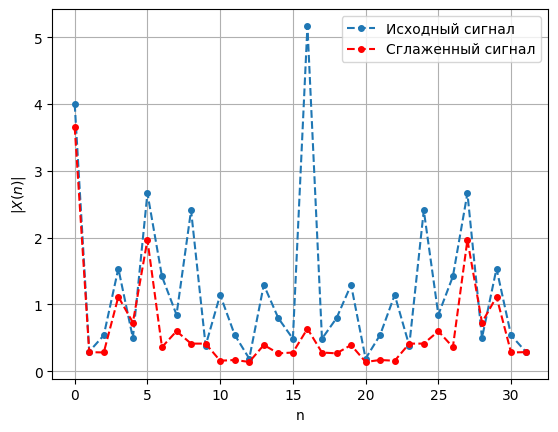

In [24]:
# ДПФ сигнала сглаженного полиномом 4-ой степени по 11-ти точкам
Xn_smooth11 = dft(S_discrete_smooth11)

# График дискретных отсчетов спектра дискретного сигнала сглаженного полиномом 4-ой степени по 11-ти точкам совместно с исходным
plt.figure()
plt.plot(t_discrete, np.abs(Xn), linestyle='--', marker='o', markersize=4, label='Исходный сигнал')
plt.plot(t_discrete, np.abs(Xn_smooth11), color='red', linestyle='--', marker='o', markersize=4, label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.legend()
plt.grid()
plt.show()

#### Пункт 7

По графику спектра видно, что он симметричен после значения $n$ равного 16, поэтому при анализе будет учитываться только 1-ая половина.

Сглаживание полиномом 4-ой степени имеет полосу пропускания еще больше, чем сглаживание полиномом 2-ой степени: начальные отсчеты остаются почти без изменений. По графику видно, что при увеличении количества точек при сглаживании, полоса пропускания уменьшается. Для сглаживания по 7-ми точкам сигнал, начиная с 6-го отсчета, хорошо повторяет исходный. Для сглаживания по 11-ти точкам сигнал, начиная с 5-го отсчета, подавляются. Полученный результат соответствует значениям $H(w)$.

## Задание 9

В ходе выполнения лабораторной работы был сформирован дискретный сигнал посредством дискретизации, с помощью ДПФ были найдены дискретные отсчеты спектра дискретного сигнала, было проведено сглаживание сигнала полиномами 1-ой, 2-ой и 4-ой степени, с помощью ДПФ были найдены дискретные отсчеты спектра дискретного сигнала после его фильтрации. По полученным сигналам были построены графики. Был проведен сопоставительный анализ результатов на соответствие значениям $H(w)$: практические результаты соответствуют теоретическим передаточным функциям, рассчитанным в предыдущих работах. Анализ показал, что для всех видов сглаживаний при увеличении количества точек полоса пропускания уменьшается, сигнал начинает хуже повторять исходный (подавляется). Также отметим, что чем больше степень полинома сглаживания, тем лучше сигнал повторяет исходный.